<a href="https://colab.research.google.com/github/Sai3851/Data-driven-Defect-Prediction/blob/main/Copy_of_testModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Unzip the archive.zip file
!unzip '/content/drive/MyDrive/Defect Prediction Project/archive.zip' -d '/content/drive/MyDrive/Defect Prediction Project/'


Archive:  /content/drive/MyDrive/Defect Prediction Project/archive.zip
  inflating: /content/drive/MyDrive/Defect Prediction Project/eclipse/eclipse/biweekly-ck-values/biweekly-ck-values/eclipse-class-cbo.csv  
  inflating: /content/drive/MyDrive/Defect Prediction Project/eclipse/eclipse/biweekly-ck-values/biweekly-ck-values/eclipse-class-dit.csv  
  inflating: /content/drive/MyDrive/Defect Prediction Project/eclipse/eclipse/biweekly-ck-values/biweekly-ck-values/eclipse-class-lcom.csv  
  inflating: /content/drive/MyDrive/Defect Prediction Project/eclipse/eclipse/biweekly-ck-values/biweekly-ck-values/eclipse-class-noc.csv  
  inflating: /content/drive/MyDrive/Defect Prediction Project/eclipse/eclipse/biweekly-ck-values/biweekly-ck-values/eclipse-class-rfc.csv  
  inflating: /content/drive/MyDrive/Defect Prediction Project/eclipse/eclipse/biweekly-ck-values/biweekly-ck-values/eclipse-class-wmc.csv  
  inflating: /content/drive/MyDrive/Defect Prediction Project/eclipse/eclipse/biweekly-o

In [ ]:
import os

# List the contents of the unzipped folder
os.listdir('/content/drive/MyDrive/Defect Prediction Project')


['archive.zip', 'eclipse', 'equinox', 'lucene', 'mylyn', 'pde']

In [ ]:
import os

# List the contents of the unzipped folder
os.listdir('/content/drive/MyDrive/Defect Prediction Project')


['archive.zip', 'eclipse', 'equinox', 'lucene', 'mylyn', 'pde']

In [ ]:
import os

# List the contents of the unzipped folder
os.listdir('/content/drive/MyDrive/Defect Prediction Project')


['archive.zip', 'eclipse', 'equinox', 'lucene', 'mylyn', 'pde']

In [ ]:
bug_metrics_path = '/content/drive/MyDrive/Defect Prediction Project/eclipse/eclipse/bug-metrics.csv'


In [ ]:
import pandas as pd

# Load the bug-metrics.csv file with the correct path and delimiter
data = pd.read_csv(bug_metrics_path, delimiter=';')

# Step 1: Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Fill missing values only for numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Display the first few rows
data.head()


,classname,numberOfBugsFoundUntil:,numberOfNonTrivialBugsFoundUntil:,numberOfMajorBugsFoundUntil:,numberOfCriticalBugsFoundUntil:,numberOfHighPriorityBugsFoundUntil:,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs,
0,org::eclipse::jdt::internal::core::search::ind...,3,2,0,0,0,0,0,0,0,0,
1,org::eclipse::jdt::internal::compiler::codegen...,0,0,0,0,0,0,0,0,0,0,
2,org::eclipse::jdt::internal::compiler::ast::AS...,55,48,6,4,2,1,0,0,0,0,
3,org::eclipse::jdt::internal::compiler::lookup:...,3,3,0,0,0,0,0,0,0,0,
4,org::eclipse::jdt::internal::eval::CodeSnippet...,15,13,1,1,0,0,0,0,0,0,


In [ ]:
import os

# Listing contents inside the 'eclipse' folder to confirm the subfolder structure
os.listdir('/content/drive/MyDrive/Defect Prediction Project/eclipse')


['eclipse']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: Identifying the numeric columns in the dataset
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Initializing the StandardScaler
scaler = StandardScaler()

# Step 3: Fitting the scaler to the numeric columns and transforming the data
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Step 4: Display the first few rows to confirm scaling
data.head()


,classname,numberOfBugsFoundUntil:,numberOfNonTrivialBugsFoundUntil:,numberOfMajorBugsFoundUntil:,numberOfCriticalBugsFoundUntil:,numberOfHighPriorityBugsFoundUntil:,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs,
0,org::eclipse::jdt::internal::core::search::ind...,-0.390673,-0.420271,-0.397661,-0.355778,-0.429845,-0.360472,-0.124469,-0.160375,-0.100656,-0.042529,
1,org::eclipse::jdt::internal::compiler::codegen...,-0.526324,-0.523412,-0.397661,-0.355778,-0.429845,-0.360472,-0.124469,-0.160375,-0.100656,-0.042529,
2,org::eclipse::jdt::internal::compiler::ast::AS...,1.960620,1.951970,1.698207,2.928582,1.437499,0.600466,-0.124469,-0.160375,-0.100656,-0.042529,
3,org::eclipse::jdt::internal::compiler::lookup:...,-0.390673,-0.368700,-0.397661,-0.355778,-0.429845,-0.360472,-0.124469,-0.160375,-0.100656,-0.042529,
4,org::eclipse::jdt::internal::eval::CodeSnippet...,0.151933,0.147004,-0.048350,0.465312,-0.429845,-0.360472,-0.124469,-0.160375,-0.100656,-0.042529,


In [ ]:
# Step 1: Identifying the categorical columns in the dataset
# Assuming any non-numeric columns are categorical
categorical_columns = data.select_dtypes(include=['object']).columns

# Step 2: Applying One-Hot Encoding to categorical columns
# This will convert categorical columns into binary columns (0s and 1s)
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Step 3: Display the first few rows to confirm the encoding
data.head()


,numberOfBugsFoundUntil:,numberOfNonTrivialBugsFoundUntil:,numberOfMajorBugsFoundUntil:,numberOfCriticalBugsFoundUntil:,numberOfHighPriorityBugsFoundUntil:,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs,...,classname _org::eclipse::jdt::internal::formatter::comment::CommentRegion,classname _org::eclipse::jdt::internal::formatter::comment::HTMLEntity2JavaReader,classname _org::eclipse::jdt::internal::formatter::comment::Java2HTMLEntityReader,classname _org::eclipse::jdt::internal::formatter::comment::JavaDocLine,classname _org::eclipse::jdt::internal::formatter::comment::JavaDocRegion,classname _org::eclipse::jdt::internal::formatter::comment::MultiCommentLine,classname _org::eclipse::jdt::internal::formatter::comment::MultiCommentRegion,classname _org::eclipse::jdt::internal::formatter::comment::SingleCommentLine,classname _org::eclipse::jdt::internal::formatter::comment::SubstitutionTextReader,classname _org::eclipse::jdt::internal::formatter::old::CodeFormatter
0,-0.390673,-0.420271,-0.397661,-0.355778,-0.429845,-0.360472,-0.124469,-0.160375,-0.100656,-0.042529,...,False,False,False,False,False,False,False,False,False,False
1,-0.526324,-0.523412,-0.397661,-0.355778,-0.429845,-0.360472,-0.124469,-0.160375,-0.100656,-0.042529,...,False,False,False,False,False,False,False,False,False,False
2,1.960620,1.951970,1.698207,2.928582,1.437499,0.600466,-0.124469,-0.160375,-0.100656,-0.042529,...,False,False,False,False,False,False,False,False,False,False
3,-0.390673,-0.368700,-0.397661,-0.355778,-0.429845,-0.360472,-0.124469,-0.160375,-0.100656,-0.042529,...,False,False,False,False,False,False,False,False,False,False
4,0.151933,0.147004,-0.048350,0.465312,-0.429845,-0.360472,-0.124469,-0.160375,-0.100656,-0.042529,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Converting the 'bugs' column to binary (0 if no bugs, 1 if there are bugs)
data['bugs'] = data['bugs'].apply(lambda x: 1 if x > 0 else 0)

# Now defining X and y again
X = data.drop('bugs', axis=1)
y = data['bugs']

# Applying SMOTE on the training dataset (after splitting)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resampling the training set using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Checking the new class distribution after resampling
print(f"Original class distribution: {y_train.value_counts()}")
print(f"Resampled class distribution: {pd.Series(y_train_resampled).value_counts()}")


Original class distribution: bugs
0    626
1    171
Name: count, dtype: int64
Resampled class distribution: bugs
0    626
1    626
Name: count, dtype: int64


In [ ]:
from tensorflow.keras import layers, models

# Step 1: Defining the encoder network model
encoder = models.Sequential()

# Input layer - matching the number of features in X_train
encoder.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layers for dimensionality reduction
encoder.add(layers.Dense(32, activation='relu'))  # Compressing the features
encoder.add(layers.Dense(16, activation='relu'))  # Further compression (latent space)

# Output layer for binary classification
encoder.add(layers.Dense(1, activation='sigmoid'))

# Step 2: Compiling the model
encoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Training the model
history = encoder.fit(X_train_resampled, y_train_resampled, epochs=20, validation_data=(X_test, y_test))

# Step 4: Evaluating the model on the test set
test_loss, test_accuracy = encoder.evaluate(X_test, y_test)

# Step 5: Display test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6226 - loss: 0.6253 - val_accuracy: 0.7950 - val_loss: 0.6619
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8114 - loss: 0.4941 - val_accuracy: 0.8350 - val_loss: 0.4847
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9177 - loss: 0.2977 - val_accuracy: 0.8700 - val_loss: 0.3830
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9696 - loss: 0.1129 - val_accuracy: 0.8450 - val_loss: 0.3704
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9948 - loss: 0.0347 - val_accuracy: 0.8600 - val_loss: 0.3756
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0140 - val_accuracy: 0.8750 - val_loss: 0.3936
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.8750 - val_loss: 0.4104
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.8750 - val_loss:

In [ ]:
encoder.save('/content/drive/MyDrive/encoder_model.h5')


In [ ]:
# Save the trained encoder in the new Keras format
encoder.save('/content/drive/MyDrive/encoder_model.keras')


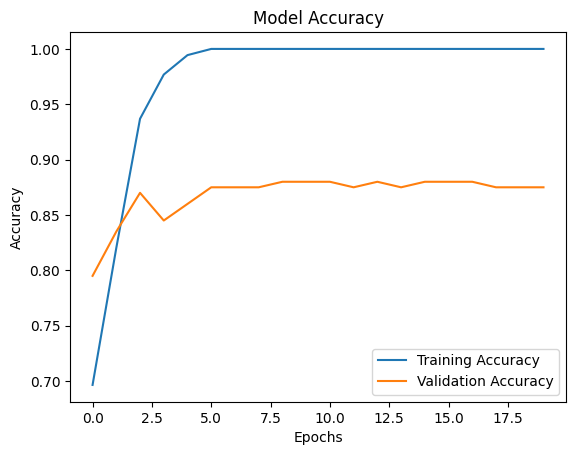

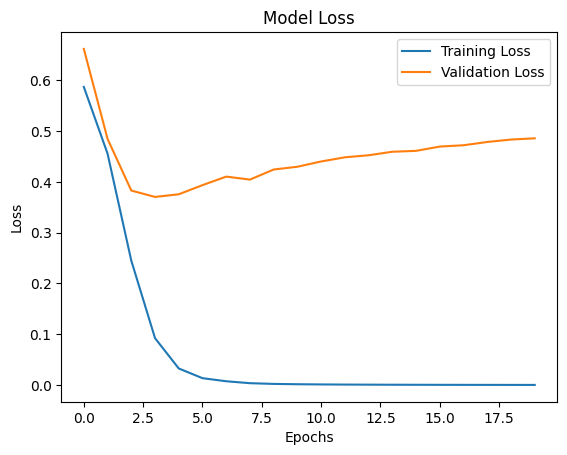

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
